# D206 Data Cleaning Performance Assessment
## Ednalyn C. De Dios

For this performance assessment, I have chosen to use the Telco churn data set.

## Part I. Research Question

### A. Question or Decision

> ### _Are customers who had not set up an automatic payment method more likely to churn than those customers who had set up an automatic payment method?_

For this question, I will attempt to address it by looking at the "PaymentMethod" variable and making a new column that designates whether the payment method is automatic or not. I will call this variable "IsPaymentAutomatic." For example, if a record's "PaymentMethod" is electronic check, bank (automatic bank transfer), or credit card (automatic), I will classify the "IsPaymentAutomatic" as 1. Otherwise, 0 for everything else. 

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

import pandas as pd # for manipulating dataframes
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization
from sklearn.impute import SimpleImputer # for handling missing values

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Read a csv file
df = pd.read_csv('churn_raw_data.csv', index_col=0)

In [3]:
# Preview the data
df.head(5)
df.tail(5)
df.shape

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,"Some College, Less than 1 Year",Retired,55723.74,Married,Male,No,9.265392,12,2,0,NaN,Month-to-month,Yes,Yes,DSL,NaN,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.19713,159.8288,6511.253,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,Regular High School Diploma,Part Time,NaN,Divorced,Male,No,8.115849,15,2,0,NaN,Two Year,No,No,Fiber Optic,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.04037,208.8564,5695.952,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,Nursery School to 8th Grade,Full Time,NaN,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),NaN,168.2209,4159.306,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1.0,39.0,Bachelor's Degree,Full Time,16667.58,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.09560,252.6286,6468.457,4,4,6,4,3,3,5,4
10000,10000,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,12230,Urban,America/New_York,Personal assistant,1.0,28.0,GED or Alternative Credential,Full Time,NaN,Never Married,Male,No,12.641760,17,1,0,NaN,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,63.35086,218.3710,5857.586,2,2,3,3,3,3,4,1


(10000, 51)

### B. Required variables

| Variable | Data Type | Description | Example
| -------------------- | -------------------- | -------------------- | -------------------- |
| **CaseOrder** | Integer | Designates the original order of the raw data file | 1-10000
| **Customer_id** | String | Unique identifier for customers | K409198, S120509, K191035
| **Interaction** | String | Unique identifiers related to customer transactions, technical support, and sign-ups | aa90260b-4141-4a24-8e36-b04ce1f4f77b
| **City** | String | Customer's city of residence | Mobeetie
| **State** | String | Customer's state of residence | TX
| **County** | String | Customer's county of residence | Wheeler
| **Zip** | Integer* | Customer's ZIP code of residence | 79061, 30117, 30523
| **Lat** | Float | GPS coordinates for lattitude of customer's residence | 34.70783
| **Lng** | Float | GPS coordinates for longitude of customer's residence | 83.53648
| **Population** | Integer | Population within a mile radius of customer's residence based on census data
| **Area** | String | Type of area for customner's residence | Rural, Urban, Suburban
| **TimeZone** | String | Time zone of customer's residence | America/Chicago
| **Job** | String | Job title of the customer | IT technical support officer
| **Children** | Float* | Number of children in the customer's household | 3.0, 4.0, 1.0
| **Age**| Float* | Customner's age | 48.0, 39.0, 28.0
| **Education** | String | Highest degree completed by cusstomer | Regular High School Diploma
| **Income** | Float | Customer's annual income | 55723.74, 16667.58, 28561.99
| **Marital** | String | Customer's  marital status | Married, Divorced, Never Married, Separated
| **Gender** | String | Customer's gender | Female, Male, Prefer not to answer
| **Churn** | String | Whether the customer discontinued service within the last month | Yes, No
| **Outage_sec_perweek** | Float | Average number of seconds per week of system outages in customer's neighborhood
| **Email** | Integer | Number of emails sent to the customer in the last year | 12, 9, 15
| **Contacts** | Integer | Number of times the customer contacted technical support | 2, 1
| **Yearly_equip_failure** | Integer | Number of times the customer's equipment failed and had top be reset or replaced in the past year | 0, 1
| **Techie** | String | Whether the customer thinks themselves as technically inclined | Yes, No
| **Contract**| String | The contract term for the customer |Month-to-month, Two Year
| **Port_modem** | String | Whether the customer has a portable modem | Yes, No
| **Tablet** | String | Whether the customer owns a tablet | Yes, No
| **InternetService** | String | The customer's type of internet service | DSL, Fiber Optic
| **Phone** | String | Whether the customer has a phone service | Yes, No
| **Multiple** | String | Whether the customer has multiple phone lines | Yes, No
| **OnlineSecurity** | String | Whether the customer has an online security add-on | Yes, No
| **OnlineBackup** | String | Whether the customer has an online backup add-on | Yes, No
| **DeviceProtection** | String | Whether the customer has device protection add-on | Yes, No
| **TechSupport** | String | Whether the customer has technical support add-on | Yes, No
| **StreamingTV** | String | Whether the customer has streaming TV | Yes, No
| **StreamingMovies** | String | Whether the customer has streaming movies | Yes, No
| **PaperlessBilling** | String | Whether the customer has enrolled in paperless billing | Yes, No
| **PaymentMethod** | String | Customer's method of payment | Electronic Check, Bank Transfer(automatic)
| **Tenure** | Float | Number of months the customer has stayed with the provider | 68.19713, 61.04037, 71.09560
| **MonthlyCharge** | Float | Amount charged to the customer monthly | 159.8288, 168.2209, 218.3710
| **Bandwidth_GB_Year** | Float | Average amount of data used by the customer in GB within a year | 6511.253, 5857.586, 4159.306
| **Item1** | Integer | Rate of the importance of timely response as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item2** | Integer | Rate of the importance of timely fixes as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item3** | Integer | Rate of the importance of timely replacements as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item4** | Integer | Rate of the importance of reliabilitye as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item5** | Integer | Rate of the importance of optionse as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item6** | Integer | Rate of the importance of respectful responsee as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item7** | Integer | Rate of the importance of courteous exchange as rated by the customer with 1 being the most important and 8 being the least important | 1-8
| **Item8** | Integer | Rate of the importance of evidence of active listening as rated by the customer with 1 being the most important and 8 being the least important | 1-8

\* Wrong data type, needs to be transformed (typecasted)

## Part II. Data Cleaning Plan

### C1. Plan to Assess the Quality of Data

- Look for duplicates
- Find missing values
- Examine data types for correctness
- Check for outliers

### C2. Justification of Approach to Assess the Quality of Data

The first step in my approach to assess the quality of the data is to look for duplicates. This is an important step because ignoring duplicates can skew the distribution of the data set and would result in incorrect visualizations like histograms.

The second step is to find missing values in the data set. This is a crucial step because missing data introduces bias into models. Missing data in the data set can also reduce the statistical power of analysis conducted on the data set.

The third step is to examine the data types for correctness. Doing so shall avoid errors stemming from incorrect data types and mismatched values.

The last step is to check for any outliers. This is necessary if the aforementioned outlier causes unnecessary skewness in the data distribution.

### C3. Justification of Tools Used to Assess the Quality of Data

I will use Python to assess the quality of the data set. Using a few libraries and packages such as pandas and matplotlib will allow me to examine and review the untidiness in the data. For example, pandas has an isnull() function that can be used to filter rows in the dataframe that has null values. Moreover, visualization packages like matplotlib allow me to eyeball any outliers in the data and give me a ballpark value to input so that I can filter and remove those outliers.

### C4. Annotated Code Used to Assess the Quality of Data

- [X] Look for duplicates
- [X] Find missing values
- [X] Examine data types for correctness
- [X] Check for outliers

#### Look for duplicates

In [4]:
# Select rows that are duplicated based on all columns. Any records after the first is considered a duplicate and can be dropped
dup = df[df.duplicated()]

# Find out how many rows are duplicated
dup.shape

(0, 51)

#### Find missing values

In [5]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0
Population,0,0.00,0,0.0,0,0.0


#### Examine datatypes for correctness

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

#### Check for outliers

In [7]:
def show_outliers(column):
    """
    Takes a column and displays a boxplot, iqr, upper and
    lower bound, along with a listing of the outliers.
    """
    plt.boxplot(df[column])
    fig = plt.figure(figsize =(10, 7))
    
    # finding the 1st quartile
    q1 = np.quantile(df[column], 0.25)
     
    # finding the 3rd quartile
    q3 = np.quantile(df[column], 0.75)
    med = np.median(df[column])
     
    # finding the iqr region
    iqr = q3-q1
     
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    print(iqr, upper_bound, lower_bound)
    
    outliers = df[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)]
    print('---------------------------------------------------------------------')
    print(column)
    print('---------------------------------------------------------------------')
    print('The following are the outliers in the boxplot\n{}'.format(outliers))
    print('\n\n')

12430.0 31813.0 -17907.0
---------------------------------------------------------------------
Population
---------------------------------------------------------------------
The following are the outliers in the boxplot
12       33372
17       50079
30       52484
45       35743
52       39649
57       46869
58       58431
67       38476
75       34359
86       35279
88       32203
91       55519
101      55122
103      31927
111      41733
121      37711
124      31859
142      43123
157      47732
158      86926
164      32653
172      43714
204      90517
213      62430
216      44451
218      33649
232      47974
241      57344
242      39035
257      34993
258      36260
260      41839
263      32603
276      48969
286      32084
292      61045
315      38579
324      34669
352      35345
353      41155
361      34460
373      51767
380      32929
385      46064
386      32525
395      31845
427      35100
433      41863
437      40305
442      39616
443      88349
446      5695

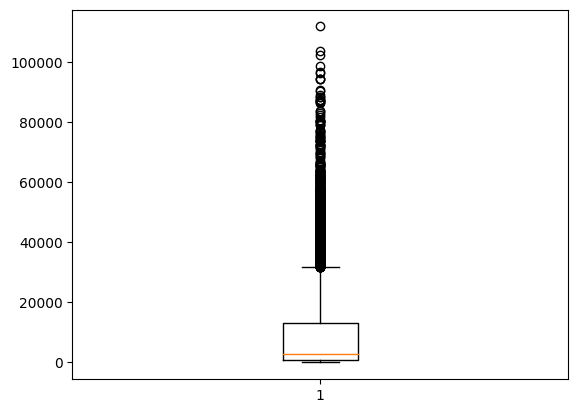

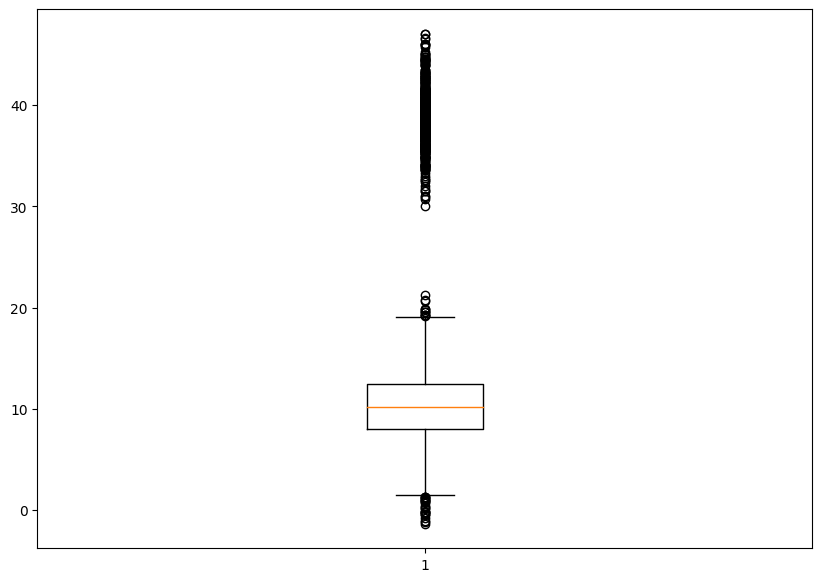

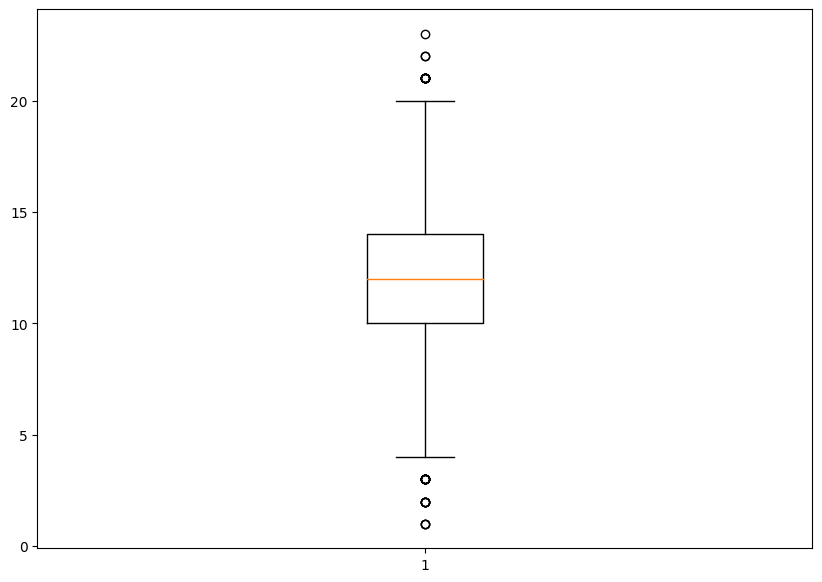

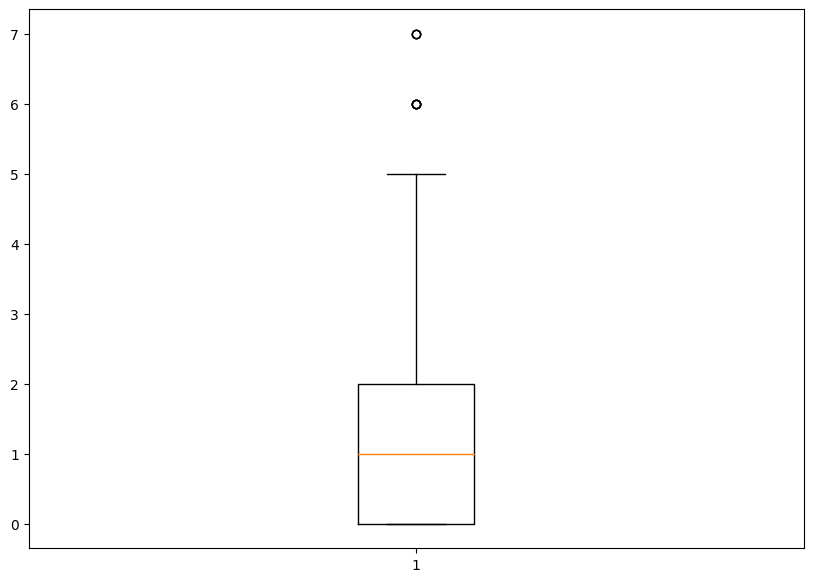

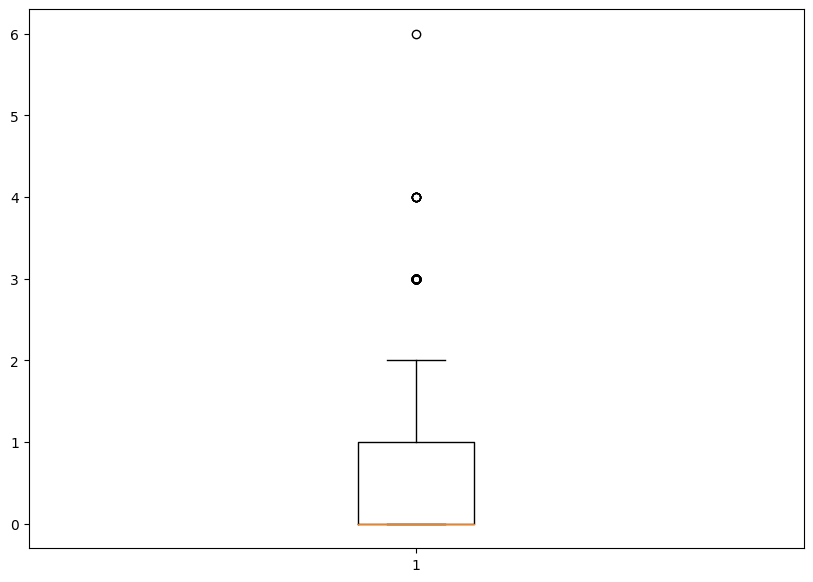

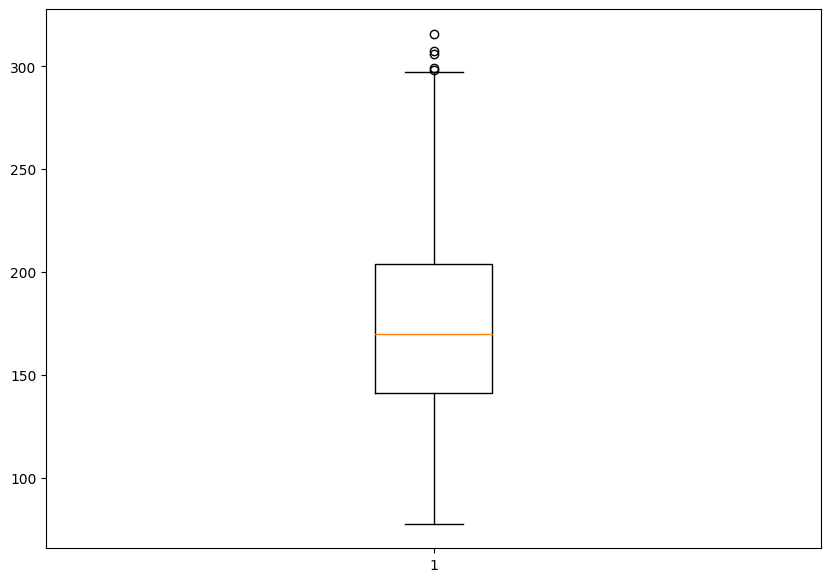

<Figure size 1000x700 with 0 Axes>

In [8]:
# assemble a list of column names that are good candidates for outliers
outlier_columns = ['Population',
                   'Outage_sec_perweek',
                   'Email',
                   'Contacts',
                   'Yearly_equip_failure',
                   'MonthlyCharge'
                  ]

# loop over the list of column names
for col in outlier_columns:
    show_outliers(col)

## Part III. Data Cleaning

In [9]:
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [10]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [11]:
dfx = df.copy()

#### Handle missing values

In [12]:
show_missing(dfx)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0
Population,0,0.00,0,0.0,0,0.0


In [13]:
# assemble list of column names that have missing values (numerical)
missing_columns_num = ['Children',
                   'Age',
                   'Income',
                   'Tenure',
                   'Bandwidth_GB_Year'
                  ]

In [14]:
def impute_mean(df, column):
    """
    Takes a dataframe and column name and returns
    a dataframe with imputed values
    """
    mean_imputer = SimpleImputer(strategy='mean')
    df[column] = mean_imputer.fit_transform(df[column].values.reshape(-1,1))
    return df

# loop over missing columns
for col in missing_columns_num:
    dfx = impute_mean(dfx, col)

In [15]:
show_missing(dfx)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0
Population,0,0.00,0,0.0,0,0.0


In [16]:
# fill the missing values of the categorical columns with 'Unknown'
dfx = dfx.fillna('Unknown')

In [17]:
show_missing(dfx)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.0,0,0.0,0,0.0
Customer_id,0,0.0,0,0.0,0,0.0
Interaction,0,0.0,0,0.0,0,0.0
City,0,0.0,0,0.0,0,0.0
State,0,0.0,0,0.0,0,0.0
County,0,0.0,0,0.0,0,0.0
Zip,0,0.0,0,0.0,0,0.0
Lat,0,0.0,0,0.0,0,0.0
Lng,0,0.0,0,0.0,0,0.0
Population,0,0.0,0,0.0,0,0.0


#### Correct data types

In [18]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  float64
 15  Education             10

In [19]:
# cast column values to their correct data types
dfx['Zip'] = dfx['Zip'].astype(str)
dfx['Children'] = dfx['Children'].astype(int)
dfx['Age'] = dfx['Age'].astype(int)

In [20]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  object 
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int32  
 14  Age                   10000 non-null  int32  
 15  Education             10

In [21]:
dfx.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,2,68,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,Regular High School Diploma,Student,39936.762226,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


#### Remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22ec9295a00>,
 'caps': [<matplotlib.lines.Line2D at 0x22ec9295f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ec9295880>],
 'medians': [<matplotlib.lines.Line2D at 0x22ec92a44c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ec92a4760>],
 'means': []}

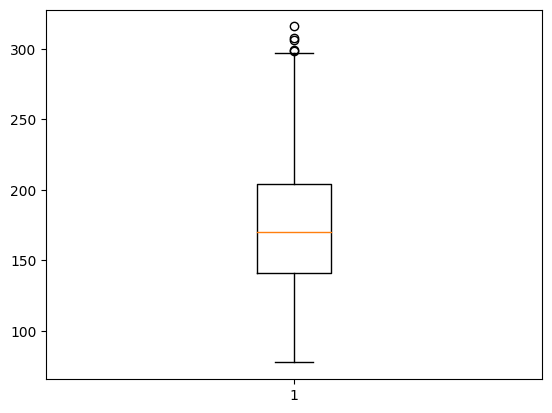

<Figure size 1000x700 with 0 Axes>

In [22]:
plt.boxplot(dfx['MonthlyCharge'])
fig = plt.figure(figsize =(10, 7))

In [23]:
# finding the 1st quartile
q1 = np.quantile(dfx['MonthlyCharge'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(dfx['MonthlyCharge'], 0.75)
med = np.median(dfx['MonthlyCharge'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = dfx['MonthlyCharge'][(dfx['MonthlyCharge'] <= lower_bound) | (dfx['MonthlyCharge'] >= upper_bound)]
print('---------------------------------------------------------------------')
print('The following are the outliers in the boxplot\n{}'.format(outliers))
print('\n\n')

62.706362825000014 297.8369855125 47.01153421249997
---------------------------------------------------------------------
The following are the outliers in the boxplot
799     299.206164
928     307.528124
1431    298.173023
3747    315.878600
4701    306.268000
Name: MonthlyCharge, dtype: float64





In [24]:
dfx.shape

# filter only rows with values below the upper bound and above the lower_bound
dfx = dfx[(dfx["MonthlyCharge"] < upper_bound) & (dfx["MonthlyCharge"] > lower_bound)]

dfx.shape

(10000, 51)

(9995, 51)

#### Cleaned dataset

In [25]:
dfx.head()
dfx.tail()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,2,68,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,Regular High School Diploma,Student,39936.762226,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,53,"Some College, Less than 1 Year",Retired,55723.740000,Married,Male,No,9.265392,12,2,0,Unknown,Month-to-month,Yes,Yes,DSL,Unknown,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.8288,6511.253,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,Regular High School Diploma,Part Time,39936.762226,Divorced,Male,No,8.115849,15,2,0,Unknown,Two Year,No,No,Fiber Optic,Unknown,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,208.8564,5695.952,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,2,53,Nursery School to 8th Grade,Full Time,39936.762226,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),34.498858,168.2209,4159.306,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,Bachelor's Degree,Full Time,16667.580000,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.6286,6468.457,4,4,6,4,3,3,5,4
10000,10000,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,12230,Urban,America/New_York,Personal assistant,1,28,GED or Alternative Credential,Full Time,39936.762226,Never Married,Male,No,12.641760,17,1,0,Unknown,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,63.350860,218.3710,5857.586,2,2,3,3,3,3,4,1


### D1. Cleaning Findings


1. Data set has no duplicates.
2. Data set has missing values both numerical and categorical.
3. A few columns had incorrect data types.
4. Outliers exist in several columns but only "MonthlyCharge" makes sense to remove.

### D2. Justification of Mitigation Efforts

1. The data set has no duplicates so no duplicates were removed.
2. The data set has several columns with missing data or nulls and NaNs. For the numerical values, the missing values were imputed by mean. For the categorical, the missing values were filled with the value of "Unknown."
3. Incorrect data types had to be dealt with manually by casting the column values to their correct data type. "Zip" was cast as a string. "Children" and "Age" were cast as integers.
4. While the data set has several columns with outliers, I have decided to only remove the outliers in "MonthlyCharge" because it is the only column that retains its truest form when the outliers were removed. Removing the outliers in other columns would skew data distribution.

### D3. Summary of the Outcomes

1. The dataframe was unchanged.
2. The dataframe retained its shape.
3. The dataframe retained its shape.
4. The dataframe decreased by four in the number of rows. The number of columns remained the same.

In the end, there were 9,995 rows and 51 columns.

### D4. Mitigation Code (Executable File)

Filename: clean_churn.py

```
#!/usr/bin/env python

""" WGU D206 Data Cleaning Performance Assessment """

import sys

# setting the random seed for reproducibility
import random
random.seed(493)

import pandas as pd # for manipulating dataframes
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization
from sklearn.impute import SimpleImputer # for handling missing values

def impute_mean(df, column):
    """
    Takes a dataframe and column name and returns
    a dataframe with imputed values
    """
    mean_imputer = SimpleImputer(strategy='mean')
    df[column] = mean_imputer.fit_transform(df[column].values.reshape(-1,1))
    return df

def main():
    """Main entry point for the script."""

    # Read a csv file
    df = pd.read_csv('churn_raw_data.csv', index_col=0)
    dfx = df.copy()

    # assemble list of column names that have missing values (numerical)
    missing_columns_num = ['Children',
                    'Age',
                    'Income',
                    'Tenure',
                    'Bandwidth_GB_Year'
                    ]

    # loop over missing columns
    for col in missing_columns_num:
        dfx = impute_mean(dfx, col)

    # fill the missing values of the categorical columns with 'Unknown'
    dfx = dfx.fillna('Unknown')

    # cast column values to their correct data types
    dfx['Zip'] = dfx['Zip'].astype(str)
    dfx['Children'] = dfx['Children'].astype(int)
    dfx['Age'] = dfx['Age'].astype(int)

    # finding the 1st quartile
    q1 = np.quantile(dfx['MonthlyCharge'], 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(dfx['MonthlyCharge'], 0.75)
    med = np.median(dfx['MonthlyCharge'])
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    # filter only rows with values below the upper bound and above the lower_bound
    dfx = dfx[(dfx["MonthlyCharge"] < upper_bound) & (dfx["MonthlyCharge"] > lower_bound)]    

    dfx.to_csv('churn_cleaned_data.csv', index=False)
    print('Dataframe shape: ' + str(dfx.shape))

if __name__ == '__main__':
    sys.exit(main())ed_data.csv', index=False)

if __name__ == '__main__':
    sys.exit(main())

### D5. Clean Data

Filename: churn_cleaned_data.csv

### D6. Limitations

During the data cleaning step of handling missing values, the categorical columns had a significant number of missing values. If the rows that have this missing values were to  be dropped, the shape of the dataframe would change dramatically from 10,000 to 4,781 records. Hence, the missing values of the categorical type were filled with the string "Unknown" instead.

This presents a minor limitation in future analysis if these categorical variables were to be examined.

### D7. Impact of Limitations

However, since the current research question mainly dealt with only "Churn" and "PaymentMethod," the current mitigation step to handle the missing categorical values was of no consequence to the current research question.

### E1. Principal Components

In [26]:
dfx.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,2,68,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,Regular High School Diploma,Student,39936.762226,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [27]:
data = dfx.copy()

In [28]:
# create data set of numeric columns
df_num = data.select_dtypes(include='number')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9995 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             9995 non-null   int64  
 1   Lat                   9995 non-null   float64
 2   Lng                   9995 non-null   float64
 3   Population            9995 non-null   int64  
 4   Children              9995 non-null   int32  
 5   Age                   9995 non-null   int32  
 6   Income                9995 non-null   float64
 7   Outage_sec_perweek    9995 non-null   float64
 8   Email                 9995 non-null   int64  
 9   Contacts              9995 non-null   int64  
 10  Yearly_equip_failure  9995 non-null   int64  
 11  Tenure                9995 non-null   float64
 12  MonthlyCharge         9995 non-null   float64
 13  Bandwidth_GB_Year     9995 non-null   float64
 14  item1                 9995 non-null   int64  
 15  item2                 999

In [29]:
# remove irrelevant columns
df_num = df_num.drop(columns=['CaseOrder', 'Lat', 'Lng'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9995 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9995 non-null   int64  
 1   Children              9995 non-null   int32  
 2   Age                   9995 non-null   int32  
 3   Income                9995 non-null   float64
 4   Outage_sec_perweek    9995 non-null   float64
 5   Email                 9995 non-null   int64  
 6   Contacts              9995 non-null   int64  
 7   Yearly_equip_failure  9995 non-null   int64  
 8   Tenure                9995 non-null   float64
 9   MonthlyCharge         9995 non-null   float64
 10  Bandwidth_GB_Year     9995 non-null   float64
 11  item1                 9995 non-null   int64  
 12  item2                 9995 non-null   int64  
 13  item3                 9995 non-null   int64  
 14  item4                 9995 non-null   int64  
 15  item5                 999

#### Normalize numeric dataframe

In [30]:
from sklearn.preprocessing import StandardScaler

features = df_num.columns
x = df_num.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [31]:
x.shape

(9995, 19)

In [32]:
np.mean(x),np.std(x)

(6.921903378827231e-18, 1.0)

In [33]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [34]:
normalised_df = pd.DataFrame(x,columns=feat_cols)

In [35]:
normalised_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18
0,-0.673586,-0.038686,0.821738,-0.463132,-0.638002,-0.666026,-1.005857,0.946201,-1.100917,-0.059218,-1.203788,1.454058,1.444538,1.471811,-0.484908,0.494751,0.486289,-0.495654,0.490434
1,0.047472,-0.574241,-1.455683,-0.742167,0.082128,-0.004960,-1.005857,0.946201,-1.324894,1.594142,-1.253747,-0.473181,0.478064,-0.473669,-0.484908,0.494751,-0.481351,0.476684,0.490434
2,-0.417461,1.032422,-0.178106,-0.000267,-0.170522,-0.996559,-1.005857,0.946201,-0.745076,-0.336929,-0.648889,0.490438,0.478064,-1.446410,0.489882,0.494751,-0.481351,-0.495654,-0.481777
3,0.284199,-0.574241,-0.289199,-0.855272,0.537982,0.986638,1.017803,-0.626081,-0.692126,-1.243198,-0.595881,0.490438,0.478064,0.499071,-1.459697,1.470488,0.486289,-0.495654,-0.481777
4,0.110239,-1.109795,1.654940,0.005325,-0.354097,1.317171,1.017803,0.946201,-1.304466,-0.537630,-1.509199,0.490438,0.478064,0.499071,-0.484908,0.494751,0.486289,0.476684,1.462645


#### Apply PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pc = pca.fit_transform(x)
pca.n_components_

13

In [37]:
pca_df = pd.DataFrame(data = pc)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.934594,-1.419864,1.908546,-0.253047,0.620822,0.948128,1.378774,-0.330418,0.030999,-0.831475,-0.081490,-0.328302,0.110520
1,-0.205834,-1.668628,0.530546,1.430787,0.636938,-0.672177,1.063801,-0.369013,1.038668,0.259433,0.751932,-1.241035,0.702777
2,-0.670827,-0.953811,0.263852,-0.181192,1.825431,0.483069,0.721415,0.141026,0.136482,-0.170569,-0.382740,-0.026754,-0.202108
3,0.043273,-0.753827,2.225064,-0.361443,-1.311256,-0.854130,0.033033,-0.337480,-0.335524,0.933689,0.364104,1.313106,-0.175789
4,1.334634,-1.960552,0.792410,-0.427770,-1.895925,0.894676,0.741967,0.890928,-1.053202,-0.216935,0.853861,0.281717,1.214967


#### Create scree plot

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

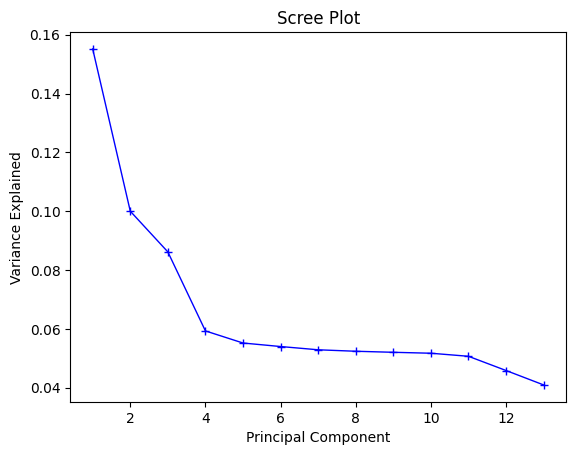

In [38]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'b+-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### Display Explained Variance Ratios

In [39]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15517006 0.10000786 0.0861633  0.05930058 0.05518868 0.05399561
 0.05288829 0.05238832 0.05203487 0.05171756 0.0506778  0.04584545
 0.04094386]


#### Plot eigenvalues

Text(0.5, 0, '# components')

Text(0, 0.5, 'eigenvalue')

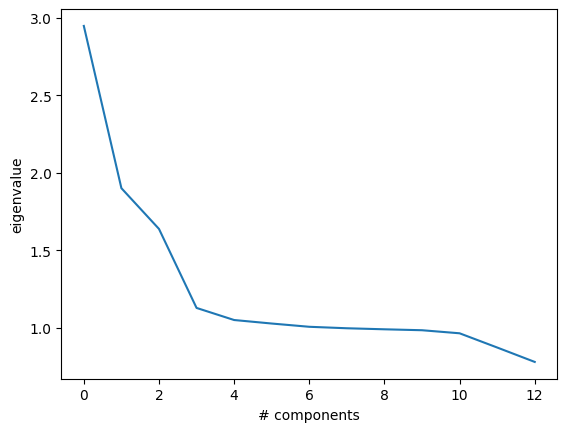

In [40]:
matrix = np.dot(normalised_df.T, normalised_df) / df_num.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(matrix, eigenvector)) for eigenvector in pca.components_]

# plot eigenvalues
plt.plot(eigenvalues)
plt.xlabel('# components')
plt.ylabel('eigenvalue')
plt.show()

#### Display component values

In [41]:
# display list of component values
values = pd.DataFrame(pca.components_.T, index=df_num.columns)
values.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Population,-0.002,0.000,0.015,-0.040,-0.310,-0.387,0.047,0.678,0.438,0.008,-0.306,-0.017,-0.061
Children,0.001,0.001,0.011,0.008,0.568,-0.207,-0.084,0.202,-0.486,0.104,-0.580,0.009,0.028
Age,0.005,-0.013,-0.017,-0.048,-0.399,0.469,0.176,0.154,-0.357,-0.554,-0.333,0.114,-0.062
Income,-0.001,0.008,0.025,0.010,0.210,0.289,-0.716,0.448,0.014,-0.226,0.314,-0.068,0.012
Outage_sec_perweek,-0.013,0.022,-0.047,0.705,0.024,-0.017,-0.015,0.054,0.029,0.028,0.046,0.693,-0.112
Email,0.008,-0.021,-0.004,0.040,-0.301,-0.558,-0.002,0.140,-0.601,-0.113,0.441,-0.044,0.065
Contacts,-0.009,0.004,-0.010,-0.013,-0.446,0.291,-0.253,0.086,-0.255,0.749,-0.122,0.017,0.040
Yearly_equip_failure,-0.008,0.016,0.007,0.076,0.275,0.324,0.615,0.487,-0.092,0.217,0.353,-0.128,0.028
Tenure,-0.011,0.701,-0.070,-0.062,-0.018,-0.005,0.004,0.000,-0.011,-0.019,0.013,0.038,0.001
MonthlyCharge,-0.000,0.046,-0.024,0.695,-0.099,0.026,-0.034,-0.074,0.013,-0.066,-0.146,-0.683,0.043


### E2. Criteria Used

After normalizing and selecting numeric features, I applied Scikit Learn's PCA and chose to keep about 85% of the variance in the original data. This resulted in the selection of 13 components.

Text(0.5, 0, '# components')

Text(0, 0.5, 'eigenvalue')

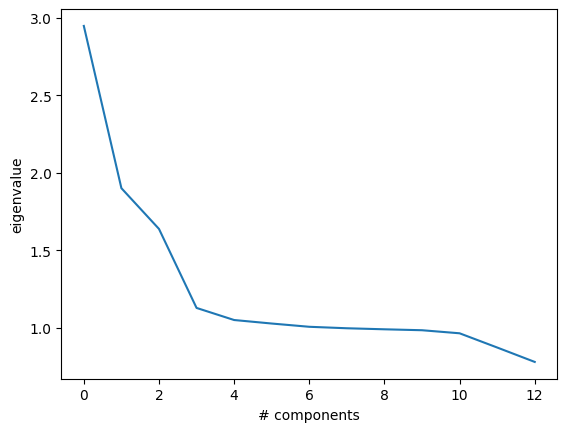

In [42]:
# plot eigenvalues
plt.plot(eigenvalues)
plt.xlabel('# components')
plt.ylabel('eigenvalue')
plt.show()

### E3. Benefits

The table of component values suggests that MonthlyCharge and Outage_sec_perweek are important features. The organization would benefit from this information by mitigating outages and curbing fees.

### F. Video

URL: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f135b5f8-80d1-4e97-bb7b-b05500b39368

### G. Sources of Third-Party Code

- https://www.datacamp.com/tutorial/principal-component-analysis-in-python
- https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
- https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
- https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
- https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/
- https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.htmls

### H. Sources

I did not use any other sources to write the text in this document.

In [43]:
print('Successful run!')

Successful run!
